In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/cancer_EUA.csv",sep=";",decimal=",")


## Analise do DF

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

### ajuste

In [4]:
df = df.drop(["binnedInc","Geography"], axis = 1 )
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

### Analise do Target

In [5]:
df["TARGET_deathRate"].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Count'>

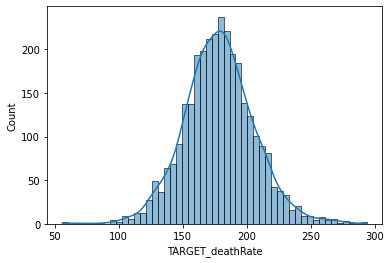

In [6]:
sns.histplot(data=df, x="TARGET_deathRate", kde=True)

### Estudo da correlacao

In [7]:
correlacao = df.corr(method='spearman')
corr_y = correlacao['TARGET_deathRate'].abs().sort_values(ascending=False)

corr_y

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

### Escolha da feature

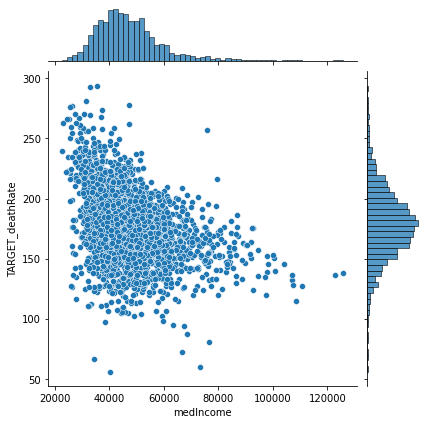

In [8]:
sns.jointplot(data=df,x='medIncome', y='TARGET_deathRate')

Pouca gente tem um salaio acima de 80.000 porem a massa se move em direcao a reducao do death rate conforme o salario aumenta

### Analise e possivel limpeza da Feature

In [9]:
df["medIncome"].describe()

count      3047.000000
mean      47063.281917
std       12040.090836
min       22640.000000
25%       38882.500000
50%       45207.000000
75%       52492.000000
max      125635.000000
Name: medIncome, dtype: float64

In [10]:
df["medIncome"].isnull().sum()

0

# Modelo de Regressao Linear Simples

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

Intercepto: 227.0875710638756
Coeficienter angular: [-0.00102716]

####################################################



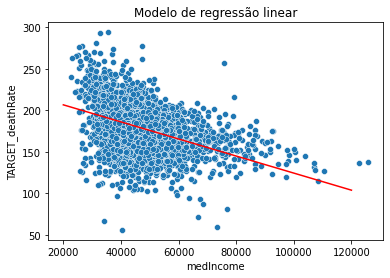


####################################################



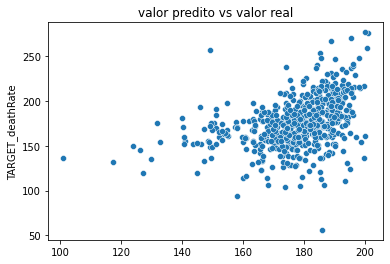

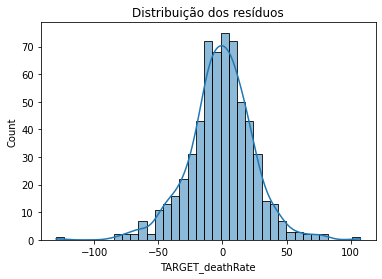


####################################################


Métricas de avaliação:

R^2: 0.15923542263340518
MAE: 18.770922679689644
MSE: 637.503121410969
RMSE: 25.248824158977563


In [14]:
X = df["medIncome"]
y = df['TARGET_deathRate']

# 1) Importar
#from sklearn.linear_model import LinearRegression

# 2) Instanciar
estimador = LinearRegression()

# 3) Dividir os dados em treino e teste
#from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 51)

# 4) Treinamento
modelo = estimador.fit(np.array(X_treino).reshape(-1, 1), y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

sns.scatterplot(data=df, x="medIncome", y="TARGET_deathRate")

x = np.linspace( 20000, 120000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

print("\n####################################################\n")

# 5) Teste
predictions = modelo.predict(np.array(X_teste).reshape(-1, 1))

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 


print('\nR^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', metrics.mean_squared_error(y_teste,predictions,squared=False))

## Modelo usando regressao linear Multipla

### Ajustando o DF

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [16]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [20]:
df.drop(columns=['PctSomeCol18_24','PctEmployed16_Over','PctPrivateCoverageAlone'])

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000        890.770529             164.9     489.800000   
1      173.000000        669.088363             161.3     411.600000   
2      102.000000        744.083462             174.7     349.700000   
3      427.000000        953.773339             194.8     430.400000   
4       57.000000        646.194438             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684        762.753992             149.6     453.549422   
3043  1962.667684        838.694585             150.1     453.549422   
3044  1962.667684        829.638887             153.9     453.549422   
3045  1962.667684        943.206276             175.0     453.549422   
3046  1962.667684        808.811353             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0       61898.0    260131.0            11.2   499.748204       39.3   
1       48127.0     43269.0            18.6    23.111234       33.0   
2       49348.0     21026.0            14.6    47.560164       45.0   
3       44243.0     75882.0            17.1   342.637253       42.8   
4       49955.0     10321.0            12.5     0.000000       48.3   
...         ...         ...             ...          ...        ...   
3042    46961.0      6343.0            12.4     0.000000       44.2   
3043    48609.0     37118.0            18.8   377.175494       30.4   
3044    51144.0     34536.0            15.0  1968.959926       30.9   
3045    50745.0     25609.0            13.3     0.000000       39.0   
3046    41193.0     37030.0            13.9     0.000000       26.2   

      MedianAgeMale  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
0              36.9  ...                75.1                41.6   
1              32.2  ...                70.2                43.6   
2              44.0  ...                63.7                34.9   
3              42.2  ...                58.4                35.0   
4              47.8  ...                61.6                35.1   
...             ...  ...                 ...                 ...   
3042           41.1  ...                78.3                44.6   
3043           29.3  ...                64.5                48.6   
3044           30.5  ...                62.0                47.8   
3045           36.9  ...                75.9                49.6   
3046           25.5  ...                76.1                22.9   

      PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
0                  32.9                    14.0  81.780529   2.594728   
1                  31.1                    15.3  89.228509   0.969102   
2                  42.1                    21.1  90.922190   0.739673   
3                  45.3                    25.0  91.744686   0.782626   
4                  44.0                    22.7  94.104024   0.270192   
...                 ...                     ...        ...        ...   
3042               31.7                    13.2  90.280811   3.837754   
3043               28.8                    17.7  75.706245   2.326771   
3044               26.6                    16.8  87.961629   2.313188   
3045               29.5                    14.0  92.905681   1.176562   
3046               25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468             51.063830   7.773512  
3043  4.044920     14.130288             52.007937   8.186470  
3044  1.316472    

In [21]:
df = df.drop(columns=['PctSomeCol18_24','PctEmployed16_Over','PctPrivateCoverageAlone'])

Intercepto: 75.88274623262006
Coeficienter angular: [-1.07854686e-03  8.48475047e-02  1.32284140e-01  5.28621388e-05
  3.44259229e-06  2.48282460e-01 -6.43577217e-05 -2.95495066e-03
 -5.25772022e-01  1.09068546e-01  6.66122094e-01  5.32812327e-01
 -5.60555321e-02  1.55309279e-01 -1.12392495e-01  3.76135303e-01
 -7.33738114e-01  4.71016914e-01 -3.57408931e-01  1.85124394e-01
  1.36658282e-01 -1.28087507e-01 -5.70310716e-02 -6.01707704e-02
 -7.06596361e-02 -7.02161707e-01 -6.86371215e-01 -5.82639354e-01]

####################################################



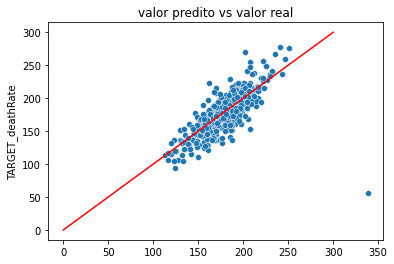

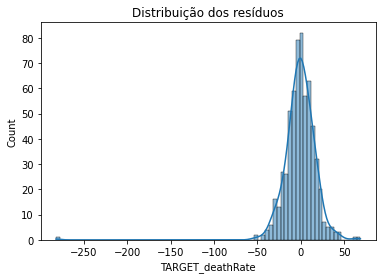


####################################################


Métricas de avaliação:

R^2: 0.5041636308107029
MAE: 12.37865992026816
MSE: 375.9640231957965
RMSE: 19.38979172646773


In [28]:
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

# 1) Importar
#from sklearn.linear_model import LinearRegression

# 2) Instanciar
#estimador = LinearRegression()

# 3) Dividir os dados em treino e teste
#from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 51)

# 4) Treinamento
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")





# 5) Teste
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0,300), np.linspace(0, 300), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 


print('\nR^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', metrics.mean_squared_error(y_teste,predictions,squared=False))

## usando min-max escaler

Intercepto: 114.02087543412411
Coeficienter angular: [-41.14009154 106.82929577 107.53377753   5.44453598  35.00932184
  10.97408471  -0.62827997  -1.77799381 -22.24015651   4.73357488
   2.62978341  26.32092898  -3.34651526  10.15722685  -5.82193125
  17.79119983 -29.12940312  12.43484653 -25.01862515  10.58911534
   7.36588139  -5.63585032  -5.12143841  -5.17154526  -3.01147303
 -29.4418169  -37.80732174 -12.42546291]

####################################################



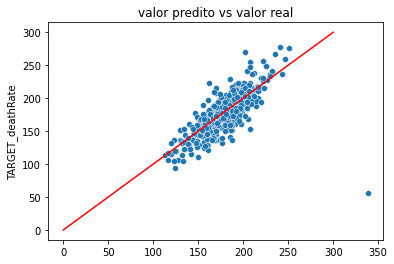

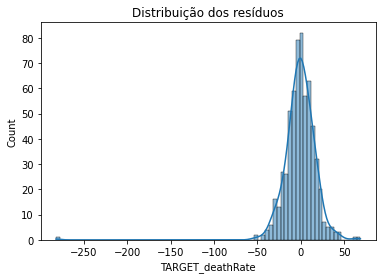


####################################################


Métricas de avaliação:

R^2: 0.504163630810706
MAE: 12.378659920268042
MSE: 375.96402319579414
RMSE: 19.38979172646767


In [29]:
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

# 1) Importar
#from sklearn.linear_model import LinearRegression

# 2) Instanciar
#estimador = LinearRegression()

# 3) Dividir os dados em treino e teste
#from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 51)




# transformando os dados

mms = MinMaxScaler()
mms.fit(X_treino)

X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)


# 4) Treinamento
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")





# 5) Teste
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(0,300), np.linspace(0, 300), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 


print('\nR^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', metrics.mean_squared_error(y_teste,predictions,squared=False))

In [30]:
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False)

Parameter value
incidenceRate                107.533778
avgDeathsPerYear             106.829296
avgAnnCount                   41.140092
PctMarriedHouseholds          37.807322
popEst2015                    35.009322
PctOtherRace                  29.441817
PctBachDeg25_Over             29.129403
PercentMarried                26.320929
PctPrivateCoverage            25.018625
MedianAgeMale                 22.240157
PctHS25_Over                  17.791200
PctUnemployed16_Over          12.434847
BirthRate                     12.425463
povertyPercent                10.974085
PctEmpPrivCoverage            10.589115
PctHS18_24                    10.157227
PctPublicCoverage              7.365881
PctBachDeg18_24                5.821931
PctPublicCoverageAlone         5.635850
medIncome                      5.444536
PctBlack                       5.171545
PctWhite                       5.121438
MedianAgeFemale                4.733575
PctNoHS18_24                   3.346515
PctAsian                       3.011473
AvgHouseholdSize               2.629783
MedianAge                      1.777994
studyPerCap                    0.628280

# Conclusao

Em geral o modelo de regressao linear nao e ideal para a resolucao deste problema, mesmo utilizando RLM o r2 ainda esta abaixo do desejado.
analisando as features com o min max escaler , a feature mais importante seruia a incidenceRate seguida pela avgDeathsPerYear.

 O modelo de RLM se mostrou mais eficiente porem nao eficaz, e nao houve diferenca nos resuiltados utilizando Min - Max escaler